In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
number_of_classes = 4
batch_size = 16
epochs = 30
file_path_train = '/Users/ismaileza/Desktop/grad/archive/training'
file_path_test = '/Users/ismaileza/Desktop/grad/archive/testing'
train_datagenetor = ImageDataGenerator()
test_datagenetor = ImageDataGenerator()

In [3]:
train_data = train_datagenetor.flow_from_directory(
    file_path_train,
    target_size=(299, 299), 
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagenetor.flow_from_directory(
    file_path_test,
    target_size=(299, 299),
    shuffle = False,
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = InceptionV3(input_shape=(299,299,3),
                         include_top = False,
                         weights = 'imagenet')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(number_of_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train model
history = model.fit(train_data, epochs=epochs)

# Evaluate model
score = model.evaluate(test_data)

# Print accuracy
print('Test accuracy:', score[1])

Epoch 1/30
357/357 [==============================] - 252s 701ms/step - loss: 1.6305 - accuracy: 0.5847
Epoch 2/30
357/357 [==============================] - 275s 770ms/step - loss: 0.8549 - accuracy: 0.6483
Epoch 3/30
357/357 [==============================] - 279s 781ms/step - loss: 0.7792 - accuracy: 0.6724
Epoch 4/30
357/357 [==============================] - 277s 777ms/step - loss: 0.7177 - accuracy: 0.7001
Epoch 5/30
357/357 [==============================] - 277s 775ms/step - loss: 0.6741 - accuracy: 0.7157
Epoch 6/30
357/357 [==============================] - 276s 774ms/step - loss: 0.6663 - accuracy: 0.7152
Epoch 7/30
357/357 [==============================] - 277s 777ms/step - loss: 0.6121 - accuracy: 0.7467
Epoch 8/30
357/357 [==============================] - 281s 786ms/step - loss: 0.6121 - accuracy: 0.7409
Epoch 9/30
357/357 [==============================] - 282s 788ms/step - loss: 0.5916 - accuracy: 0.7505
Epoch 10/30
357/357 [==============================] - 282s 789m

82/82 [==============================] - 51s 617ms/step
Accuracy: 0.8154080854309688
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.73       300
           1       0.63      0.68      0.66       306
           2       0.88      0.96      0.92       405
           3       0.91      0.92      0.92       300

    accuracy                           0.82      1311
   macro avg       0.81      0.80      0.80      1311
weighted avg       0.82      0.82      0.81      1311



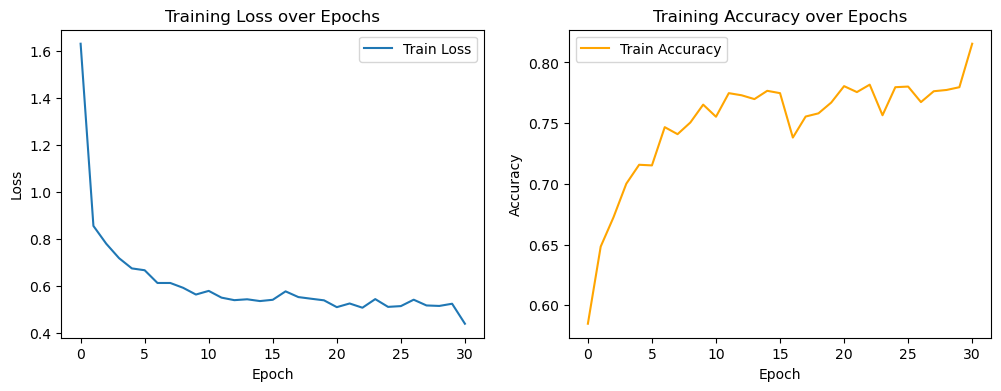

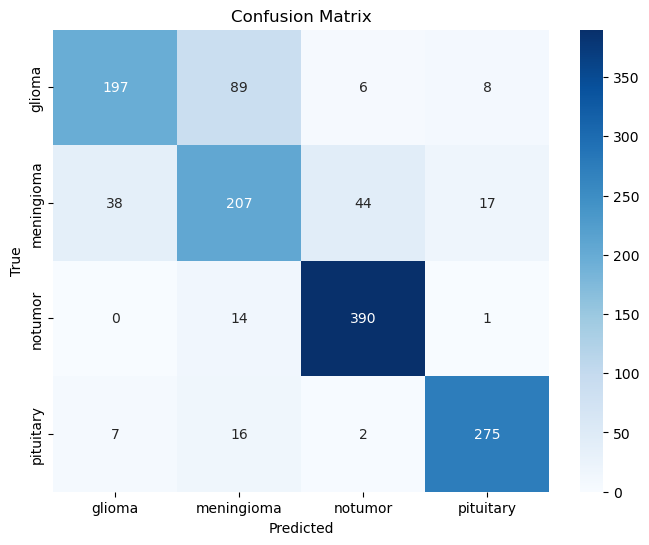

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data.classes

accuracy = accuracy_score(true_classes, predicted_classes)
print('Accuracy:', accuracy)

report = classification_report(true_classes, predicted_classes)
print('Classification Report:\n', report)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

y_true = test_data.classes
y_pred_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices, yticklabels=train_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model.save('Google_NET_Model_Result.h5')